In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv(r"C:\Users\Prabhu\Downloads\bank_market.csv")

In [3]:
# checking first five records in the dataset
data.head()

Cust_num  age           job  marital  education default  balance housing  \
0         1   58    management  married   tertiary      no     2143     yes   
1         2   44    technician   single  secondary      no       29     yes   
2         3   33  entrepreneur  married  secondary      no        2     yes   
3         4   47   blue-collar  married    unknown      no     1506     yes   
4         5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
# checking last five records in the dataset
data.tail()

Cust_num  age           job   marital  education default  balance  \
45206     45207   51    technician   married   tertiary      no      825   
45207     45208   71       retired  divorced    primary      no     1729   
45208     45209   72       retired   married  secondary      no     5715   
45209     45210   57   blue-collar   married  secondary      no      668   
45210     45211   37  entrepreneur   married  secondary      no     2971   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
45206      no   no   cellular   17   nov       977         3     -1         0   
45207      no   no   cellular   17   nov       456         2     -1         0   
45208      no   no   cellular   17   nov      1127         5    184         3   
45209      no   no  telephone   17   nov       508         4     -1         0   
45210      no   no   cellular   17   nov       361         2    188        11   

      poutcome    y  
45206  unknown  yes  
45207  unknown  yes  
45208  success  yes  
45209  unknown   no  
45210    other   no

In [5]:
# printing total number of rows and columns in the dataset using shape function
data.shape

(45211, 18)

In [6]:
#Printing all the columns present in data
data.columns

Index(['Cust_num', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
data.describe()

Cust_num           age        balance           day      duration  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean   22606.000000     40.936210    1362.272058     15.806419    258.163080   
std    13051.435847     10.618762    3044.765829      8.322476    257.527812   
min        1.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11303.500000     33.000000      72.000000      8.000000    103.000000   
50%    22606.000000     39.000000     448.000000     16.000000    180.000000   
75%    33908.500000     48.000000    1428.000000     21.000000    319.000000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

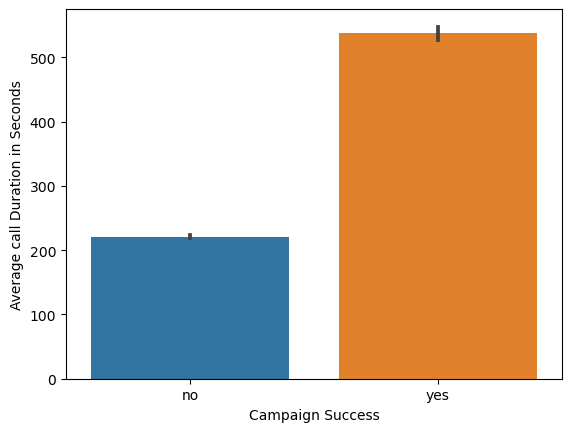

In [8]:
# checking average call duration impact on campaign success
sns.barplot(x=data['y'],y=data['duration'])
plt.ylabel('Average call Duration in Seconds')
plt.xlabel('Campaign Success')
plt.show()

## Summary:

* **Mean age** is approximately 41 years old. Minimun age 18 years and Maximum age is 95 years
* The **mean balance** is 1,362. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset
* **Duration** is highly correlated in whether a potential client will buy a term deposit or not



In [9]:
# A closer look at the data types present in the data
data.dtypes

Cust_num      int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int

### Integer Data Type

In [10]:
data.dtypes[data.dtypes == 'int64']

Cust_num    int64
age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

Summary:

*    **Cust_num** are a unique number assigned to customers. It is **Okay as Integer**.

*    **day** and **duration** are numbers. so it is okay as integers.

*    **Age** and **balance** are also numbers and hence we are okay with them as integers.

*    All the variables are numbers so we are okay with integer datatypes.

### Object Data Type

In [11]:
data.dtypes[data.dtypes == 'O']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

All the variables in object datatype are looks like **categories**. so in order to save some storage space we need to **convert all the object datatypes to categorical datatypes**

In [12]:
#converting all the object datatype columns into categorical datatype
data['job']=data['job'].astype('category')
data['marital']=data['marital'].astype('category')
data['education']=data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['contact']=data['contact'].astype('category')
data['month']=data['month'].astype('category')
data['poutcome']=data['poutcome'].astype('category')
data['y']=data['y'].astype('category')


In [13]:
data.dtypes

Cust_num        int64
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

## Univariate Analysis: Numerical Variables

In [14]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

Cust_num    int64
age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [15]:
#segregate data into groups
cust_info=['Cust_num','age','balance']
days_info=['day','duration','campaign','pdays','previous']

In [16]:
#custom function for univariate analysis
def UVA_numeric(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(7*size,3),dpi=100)
    for j,i in enumerate(var_group):
        mini=data[i].min()
        maxi=data[i].max()
        ran=data[i].max()-data[i].min()
        mean=data[i].mean()
        median=data[i].median()
        stdev=data[i].std()
        skew=data[i].skew()
        kurt=data[i].kurtosis()
        points=mean-stdev,mean+stdev
        #plotting information with every variable
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],fill=True)
        sns.lineplot(x=points,y=[0,0],color='red',label='stdev')
        sns.scatterplot(x=[mini,maxi],y=[0,0],color='orange',label='min/max')
        sns.scatterplot(x=[mean],y=[0],color='black',label='mean')
        sns.scatterplot(x=[median],y=[0],color='pink',label='median')
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('density')
        plt.title("stdev={};kurt={}\nskew={};range={}\nmean={};median={}".format((round(points[0],2)),
                                                                                 round(kurt,2),
                                                                                 round(skew,2),
                                                                                 (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                 round(mean,2),
                                                                                 round(median,2)))

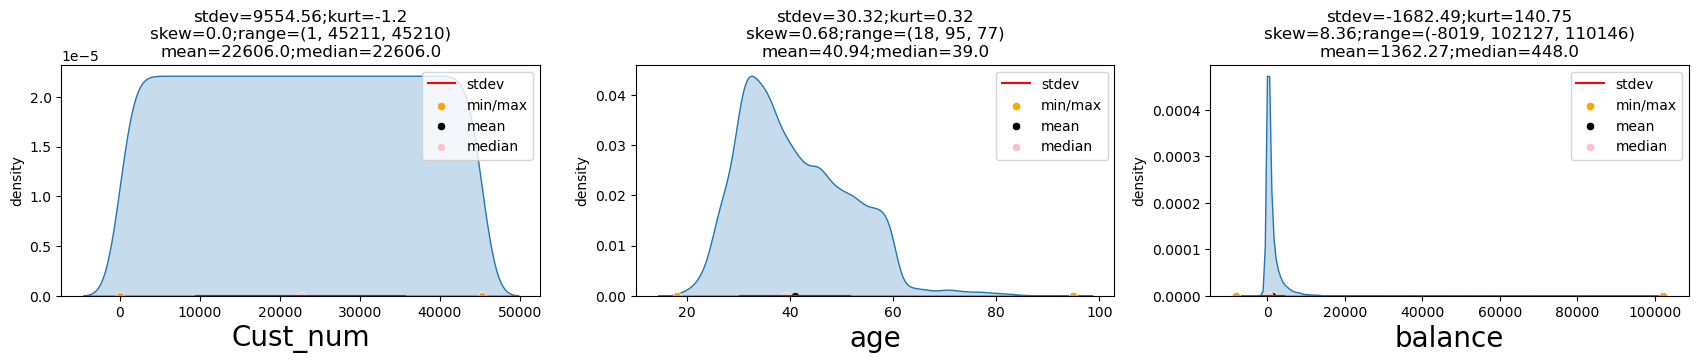

In [17]:
UVA_numeric(data,cust_info)

**Summary of Customer_Information:**
*    **customer_id**:
     * This variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 39
    *    **Most customers age between 30 to 50**
    *    **skewness +0.68** : customer age is approximately symmetric, but there is a slight tendency for the values to be more concentrated on the left side, with a tail extending to the right.
    *    **kurtosis = +o.32**; This indicates the distribution has thinner tails compared to a normal distribution. This suggests that extreme values (outliers) are less likely in the dataset.
*    **balance:**
    *    **A skewness of 8.36** is quite high, suggesting a substantial rightward skewness. This indicates that there may be a presence of outliers or an elongated right tail in the data.
    *    **A kurtosis of 140.75** is extremely high, indicating a distribution with very heavy tails. This suggests that there are significant outliers or extreme values in the data.

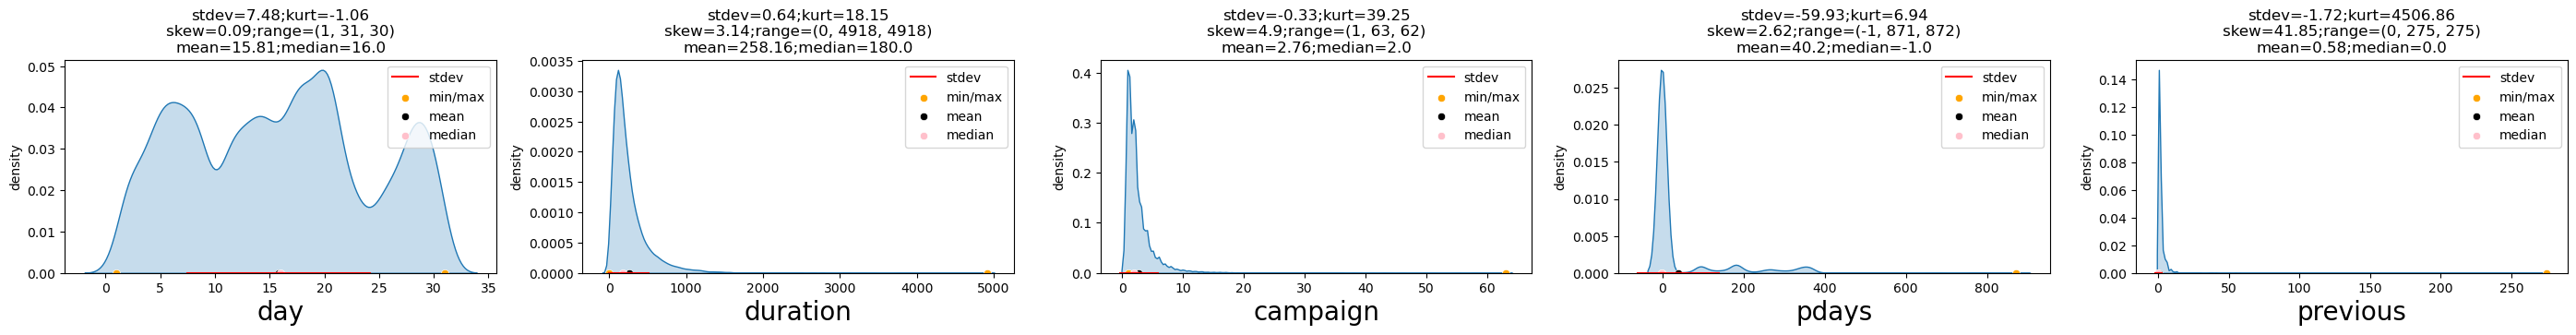

In [18]:
UVA_numeric(data,days_info)

**Summary**
*    Except day Considering the kurtosis and skewness value  for all 4 of the plots. Outliers/Extreme values are obvious.

**Need to Remove Outliers to visulaise these plots**

In [19]:
# standard deviation factor
factor = 3

# copying days info variables
days_data= data[days_info]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
days_data = days_data[days_data['duration'] < factor*days_data['duration'].std()]
days_data = days_data[days_data['campaign'] < factor*days_data['campaign'].std()]
days_data = days_data[days_data['pdays'] < factor*days_data['pdays'].std()]
days_data = days_data[days_data['previous'] < factor*days_data['previous'].std()]

# checking how many points removed
len(data), len(days_data)
removed_points = len(data)-len(days_data)
removed_points

6355

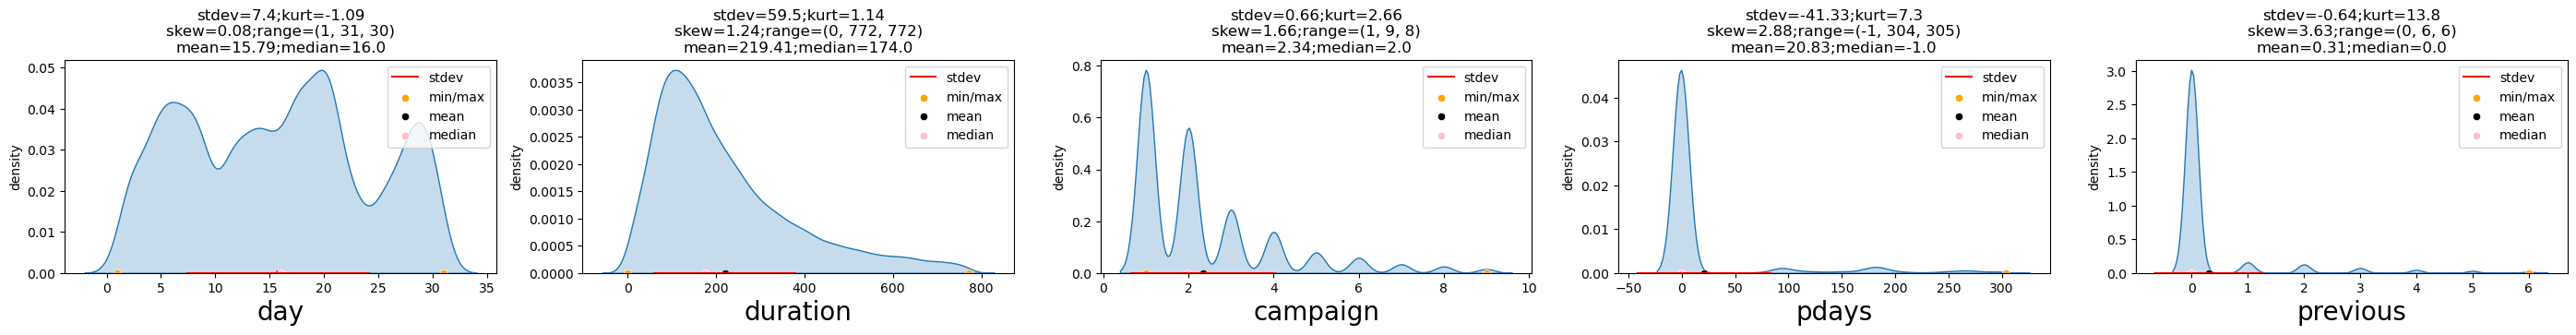

In [20]:
UVA_numeric(days_data,days_info)

**Summary of days data**
*    After Removing extreme/outliers, plots are still very skewed.

## Univariate Analysis : Categorical Varibales

In [21]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

job          category
marital      category
education    category
default      category
housing      category
loan         category
contact      category
month        category
poutcome     category
y            category
dtype: object

In [22]:
#grouping the data
cust_info=['job','marital','education','contact']
bank_details=['default','housing','loan','month','poutcome','y']

In [23]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)*100
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

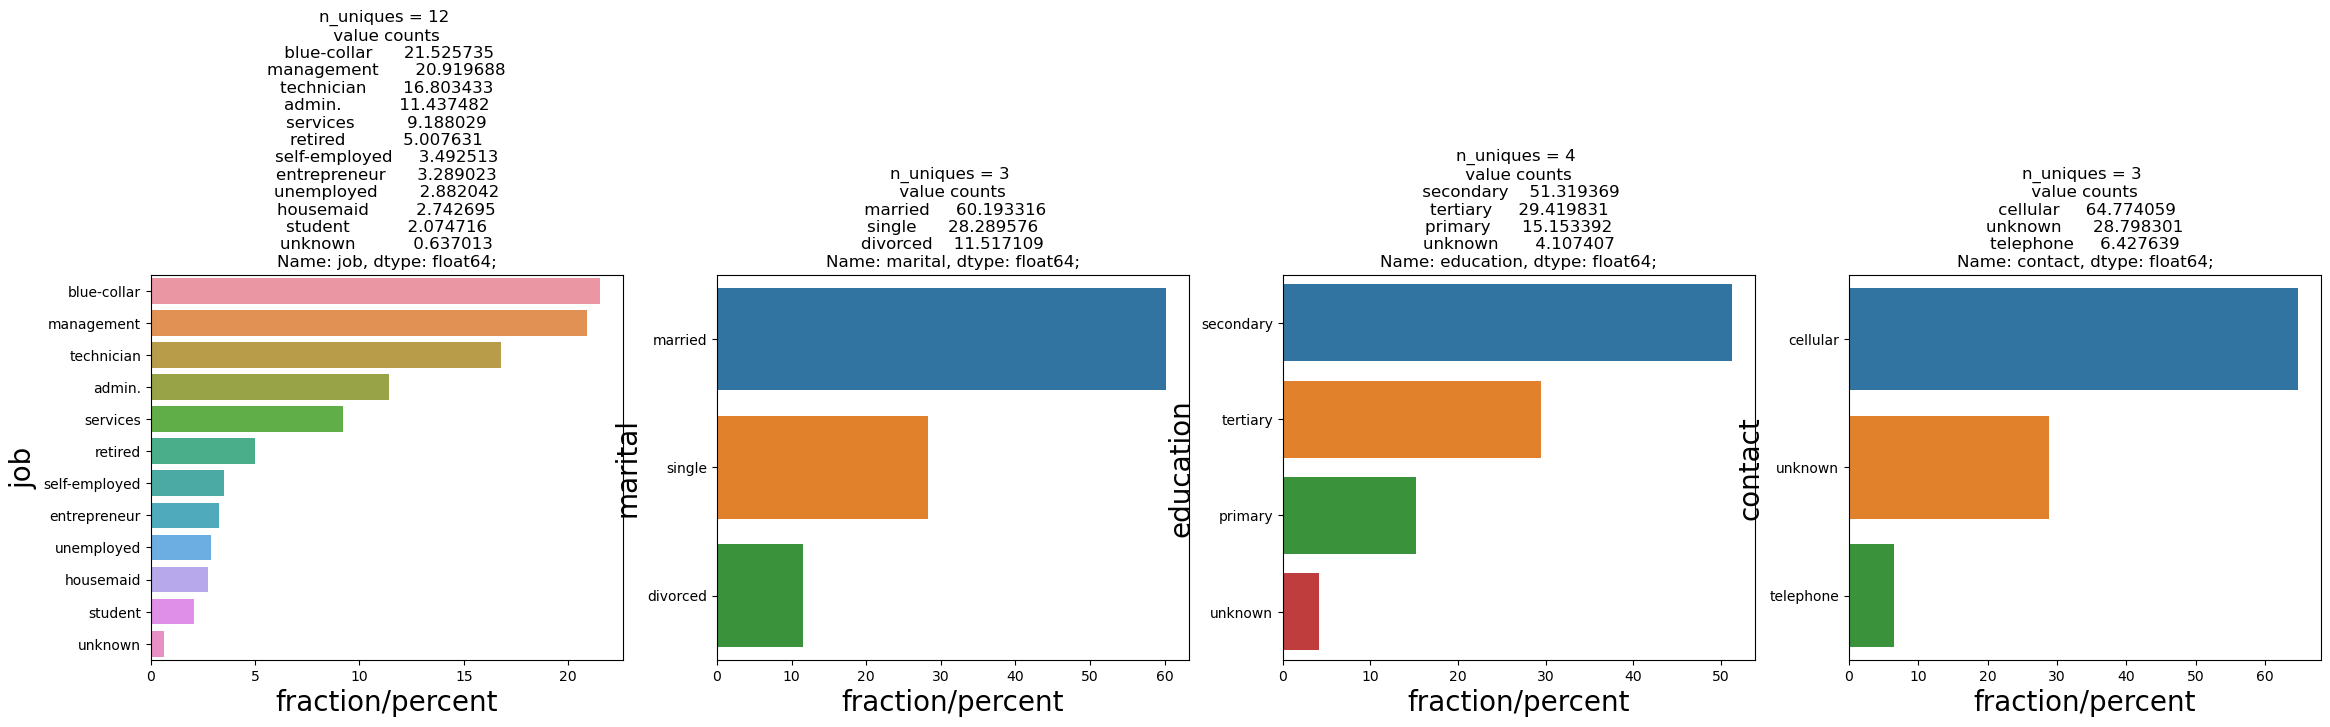

In [24]:
UVA_category(data, cust_info)

**Summary**
* Job
  * Highest number of customers are doing **blue collar job which is 21%** and 0.63% of the people's job is unkmown.
  * Majority of the people belongs to the job category of **blue collar,management,technician and admin which consists               approximately 68%** of the total people.
    
* Marital
  * Majority of the people are **married which is 60%** and another **40% of the people are either single or divorced**.
    
* Education
  * **Around 51% of the customers are completed secondary education** and around 30% of the customers are completed tertiary       education and another **20% of the customers either done primary or unknown**.

* Contact
  * Majority of the people are using **cellular phones which is around 64%**. Around 28% people's contact information is unknown
    and other **6% customers** are using telephone
    

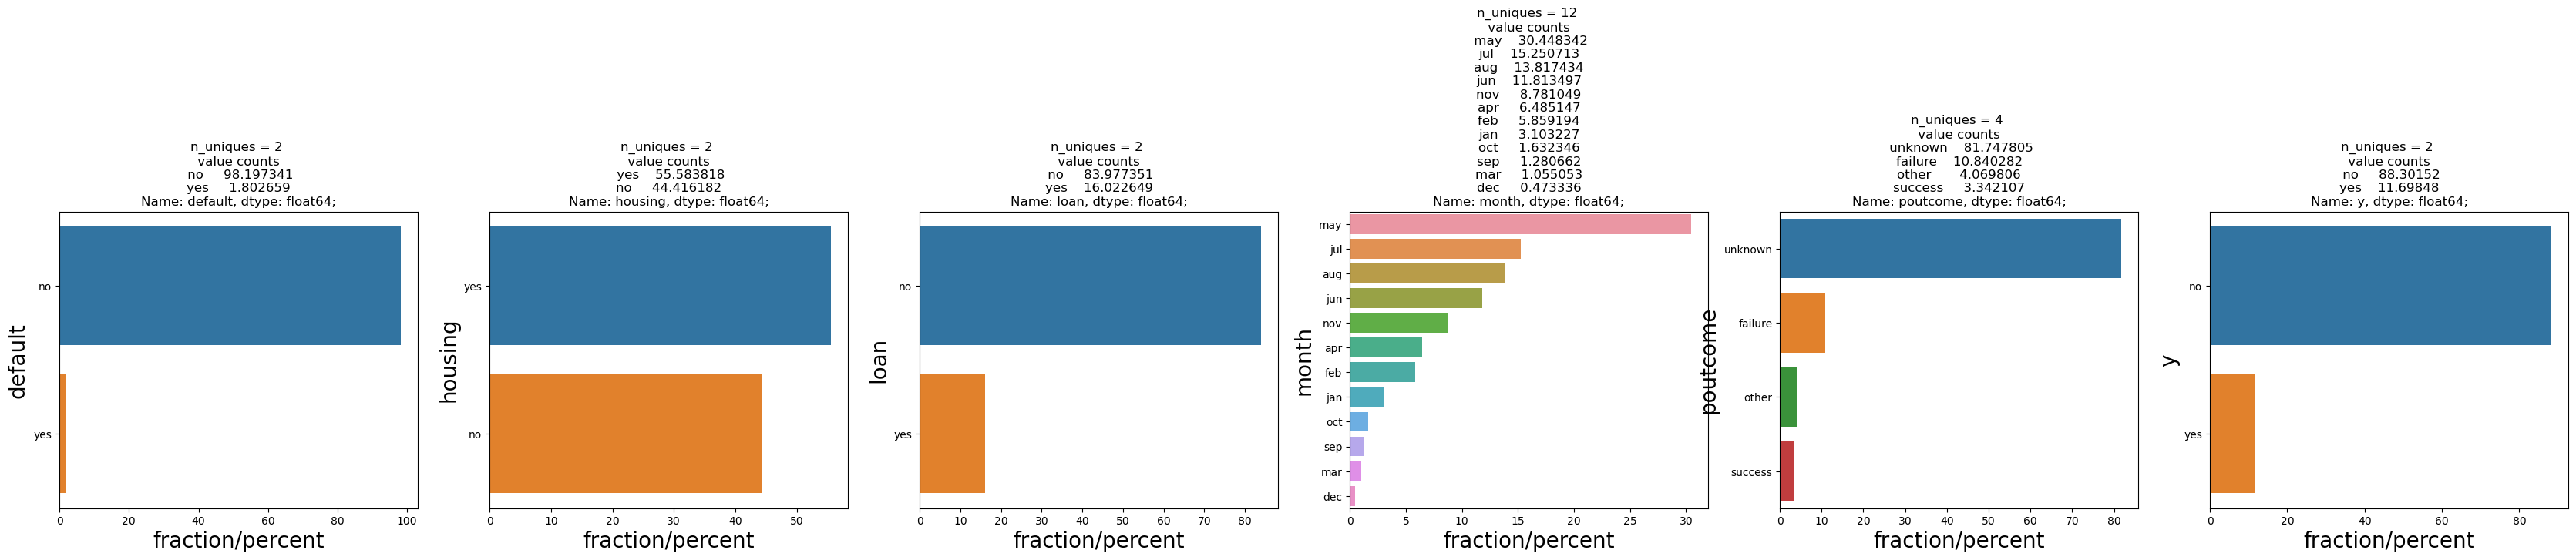

In [25]:
UVA_category(data,bank_details)

**Summary**
* Default
  * **98% of the customers are non defaulters** and only **1.8% of the customers are defaulters**. Majority of the customers had 
    repaid their credit and maintained their credit worthiness.
    
* Housing
  * Around **55% of the customers have taken house loan** and around 44% of the customers have not taken house loan.
    
* Loan
  * Majority of the cusomers have **not taken personal loan** that is around 83% of the customers. only 16% of the customers 
    have taken personal loan.

* Month
  * Highest number of customers last contacted on **the month of may. May,July,August,June** are the most last contacted months
    and **oct,sep,mar,dec** are the least contacted months.
  * We can clearly say that most customers are **contacted in the middle of the year** that is may,july,august and june.
  * Customers are contacted very less at **year ending months** and also **financial year ending month** which is March.

* Poutcome
  * Outcome of the **majority of the previous marketing campaigns is unknown**. 10% of the previous marketing camapains have failed
    and **only 3.34%** of the previous marketing campaigns are success.
    
* Y(subscribed for term deposit or not)
  * Majority of the customers have not subscribed for term deposit. only around 12% of the customers have subscribed.

## Univariate: Missing Values

In [26]:
# finding number of missing values in every variable
data.isnull().sum()

Cust_num     0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in the data

## Univariate Analysis: Outliers

**It seems like there are outliers in balance,campaign,pdays and previous lets check**

In [27]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):


  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True
True


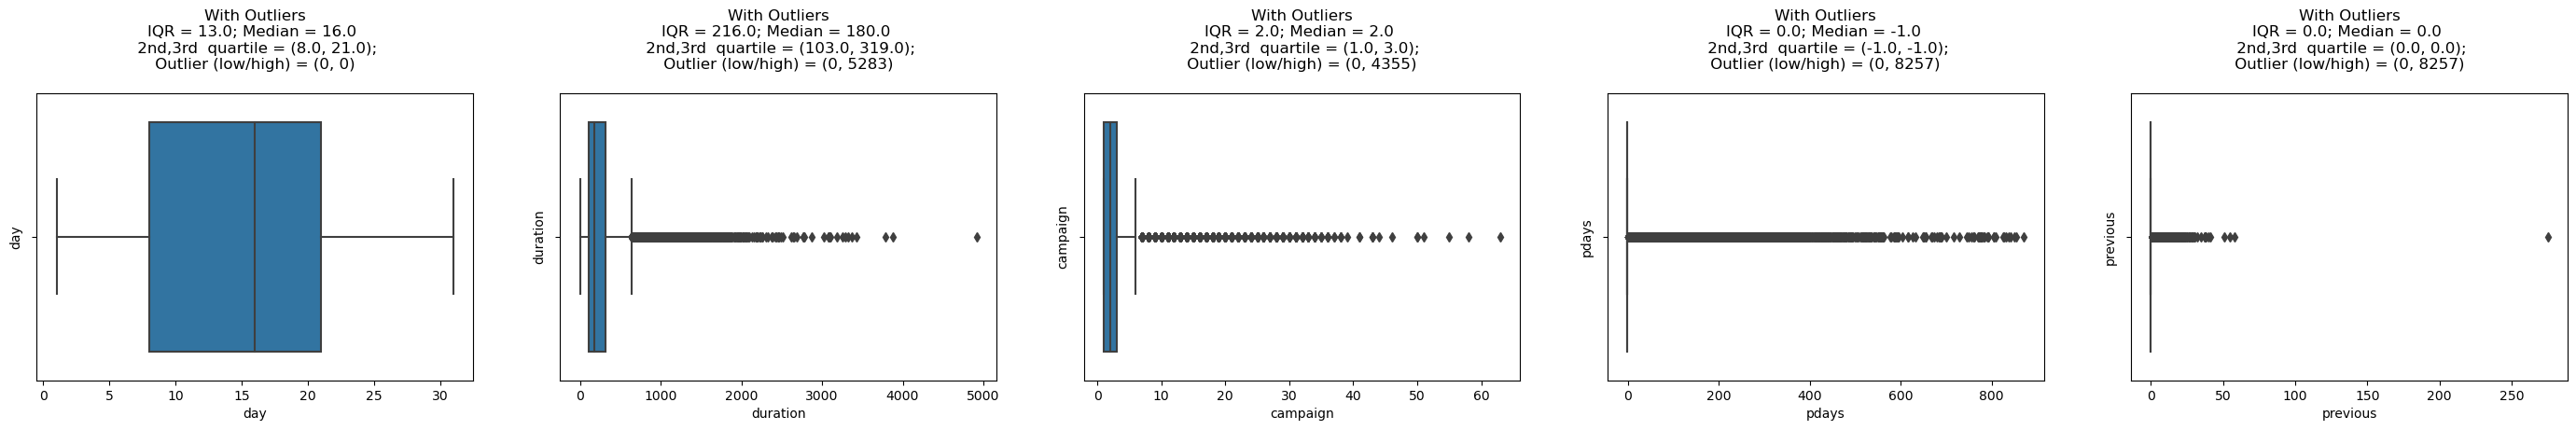

In [28]:
UVA_outlier(data,days_info)

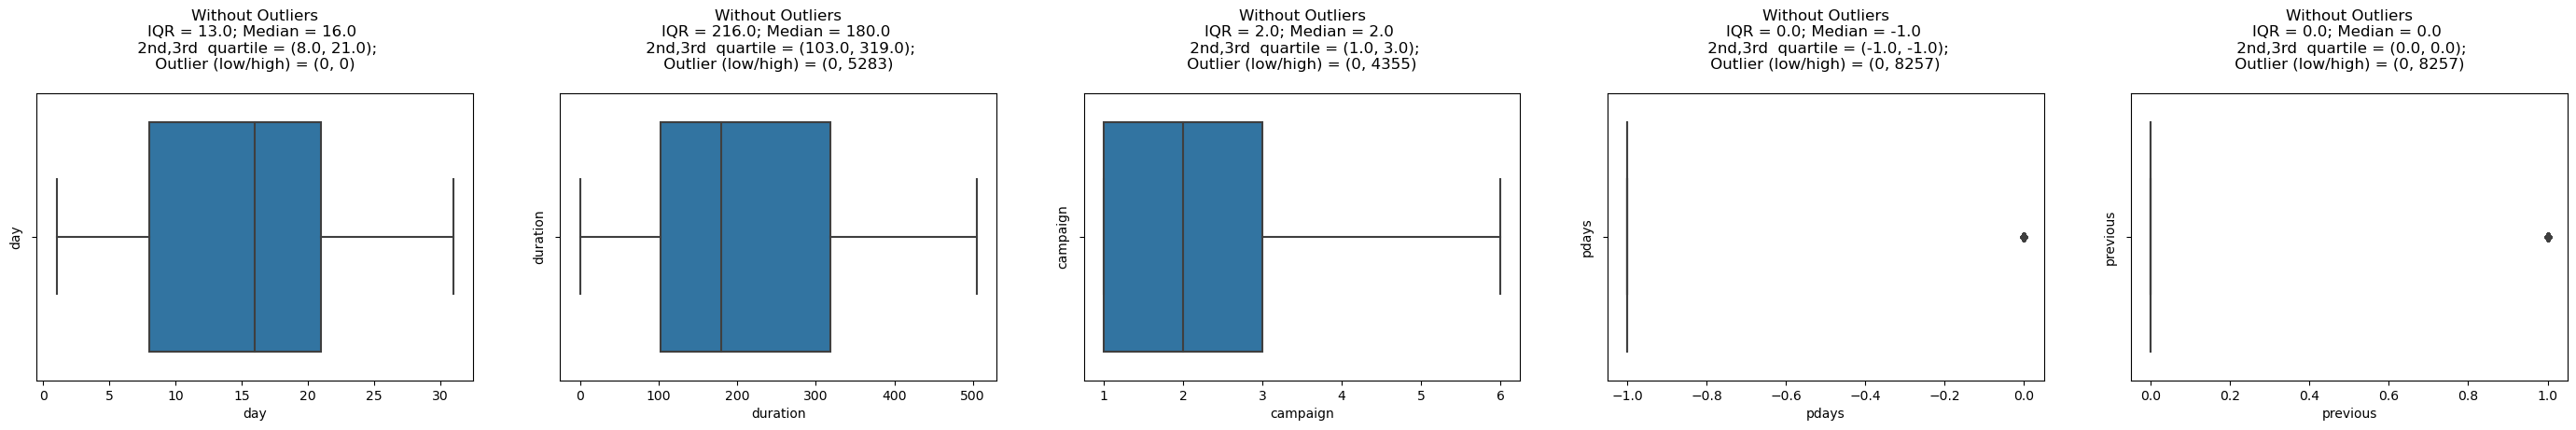

In [29]:
UVA_outlier(data,days_info,include_outlier=False)

**Outliers are significant in number in duration and campaign variables and there are extreme outliers in pdays and previous variables**

## Bivariate Analysis : Numerical-Numerical

In [30]:
# selecting numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Cust_num    int64
age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

### Correlation Matrix

In [32]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

Cust_num       age   balance       day  duration  campaign  \
Cust_num  1.000000  0.014973  0.073639 -0.061465  0.013031 -0.102884   
age       0.014973  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance   0.073639  0.097783  1.000000  0.004503  0.021560 -0.014578   
day      -0.061465 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration  0.013031 -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign -0.102884  0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays     0.437729 -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous  0.271098  0.001288  0.016674 -0.051710  0.001203 -0.032855   

             pdays  previous  
Cust_num  0.437729  0.271098  
age      -0.023758  0.001288  
balance   0.003435  0.016674  
day      -0.093044 -0.051710  
duration -0.001565  0.001203  
campaign -0.088628 -0.032855  
pdays     1.000000  0.454820  
previous  0.454820  1.000000

### Heatmap

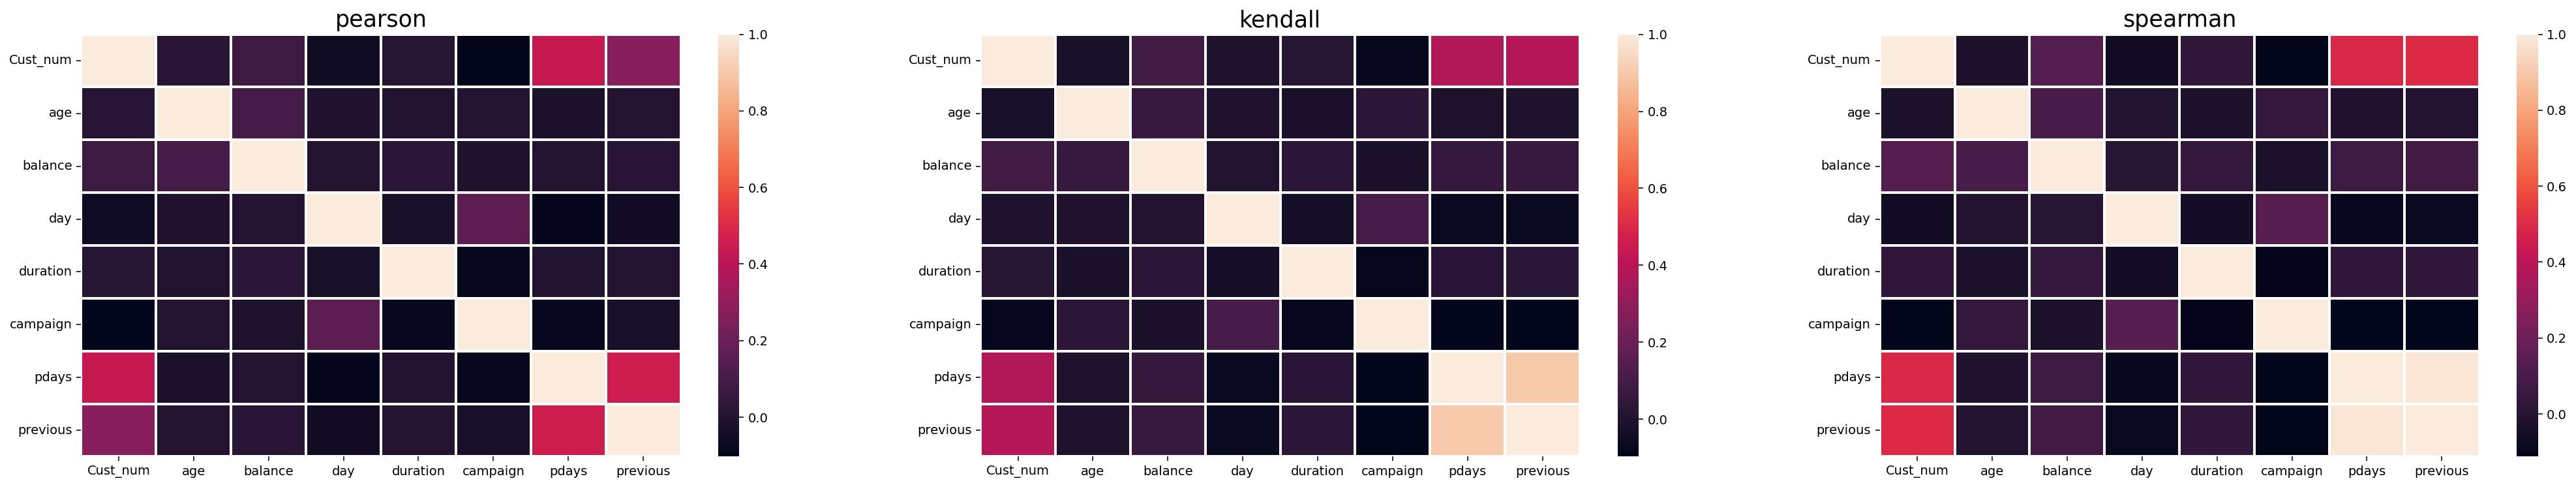

In [33]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the pdays variables and previous variables.

### Scatterplot

<Figure size 896x672 with 0 Axes>

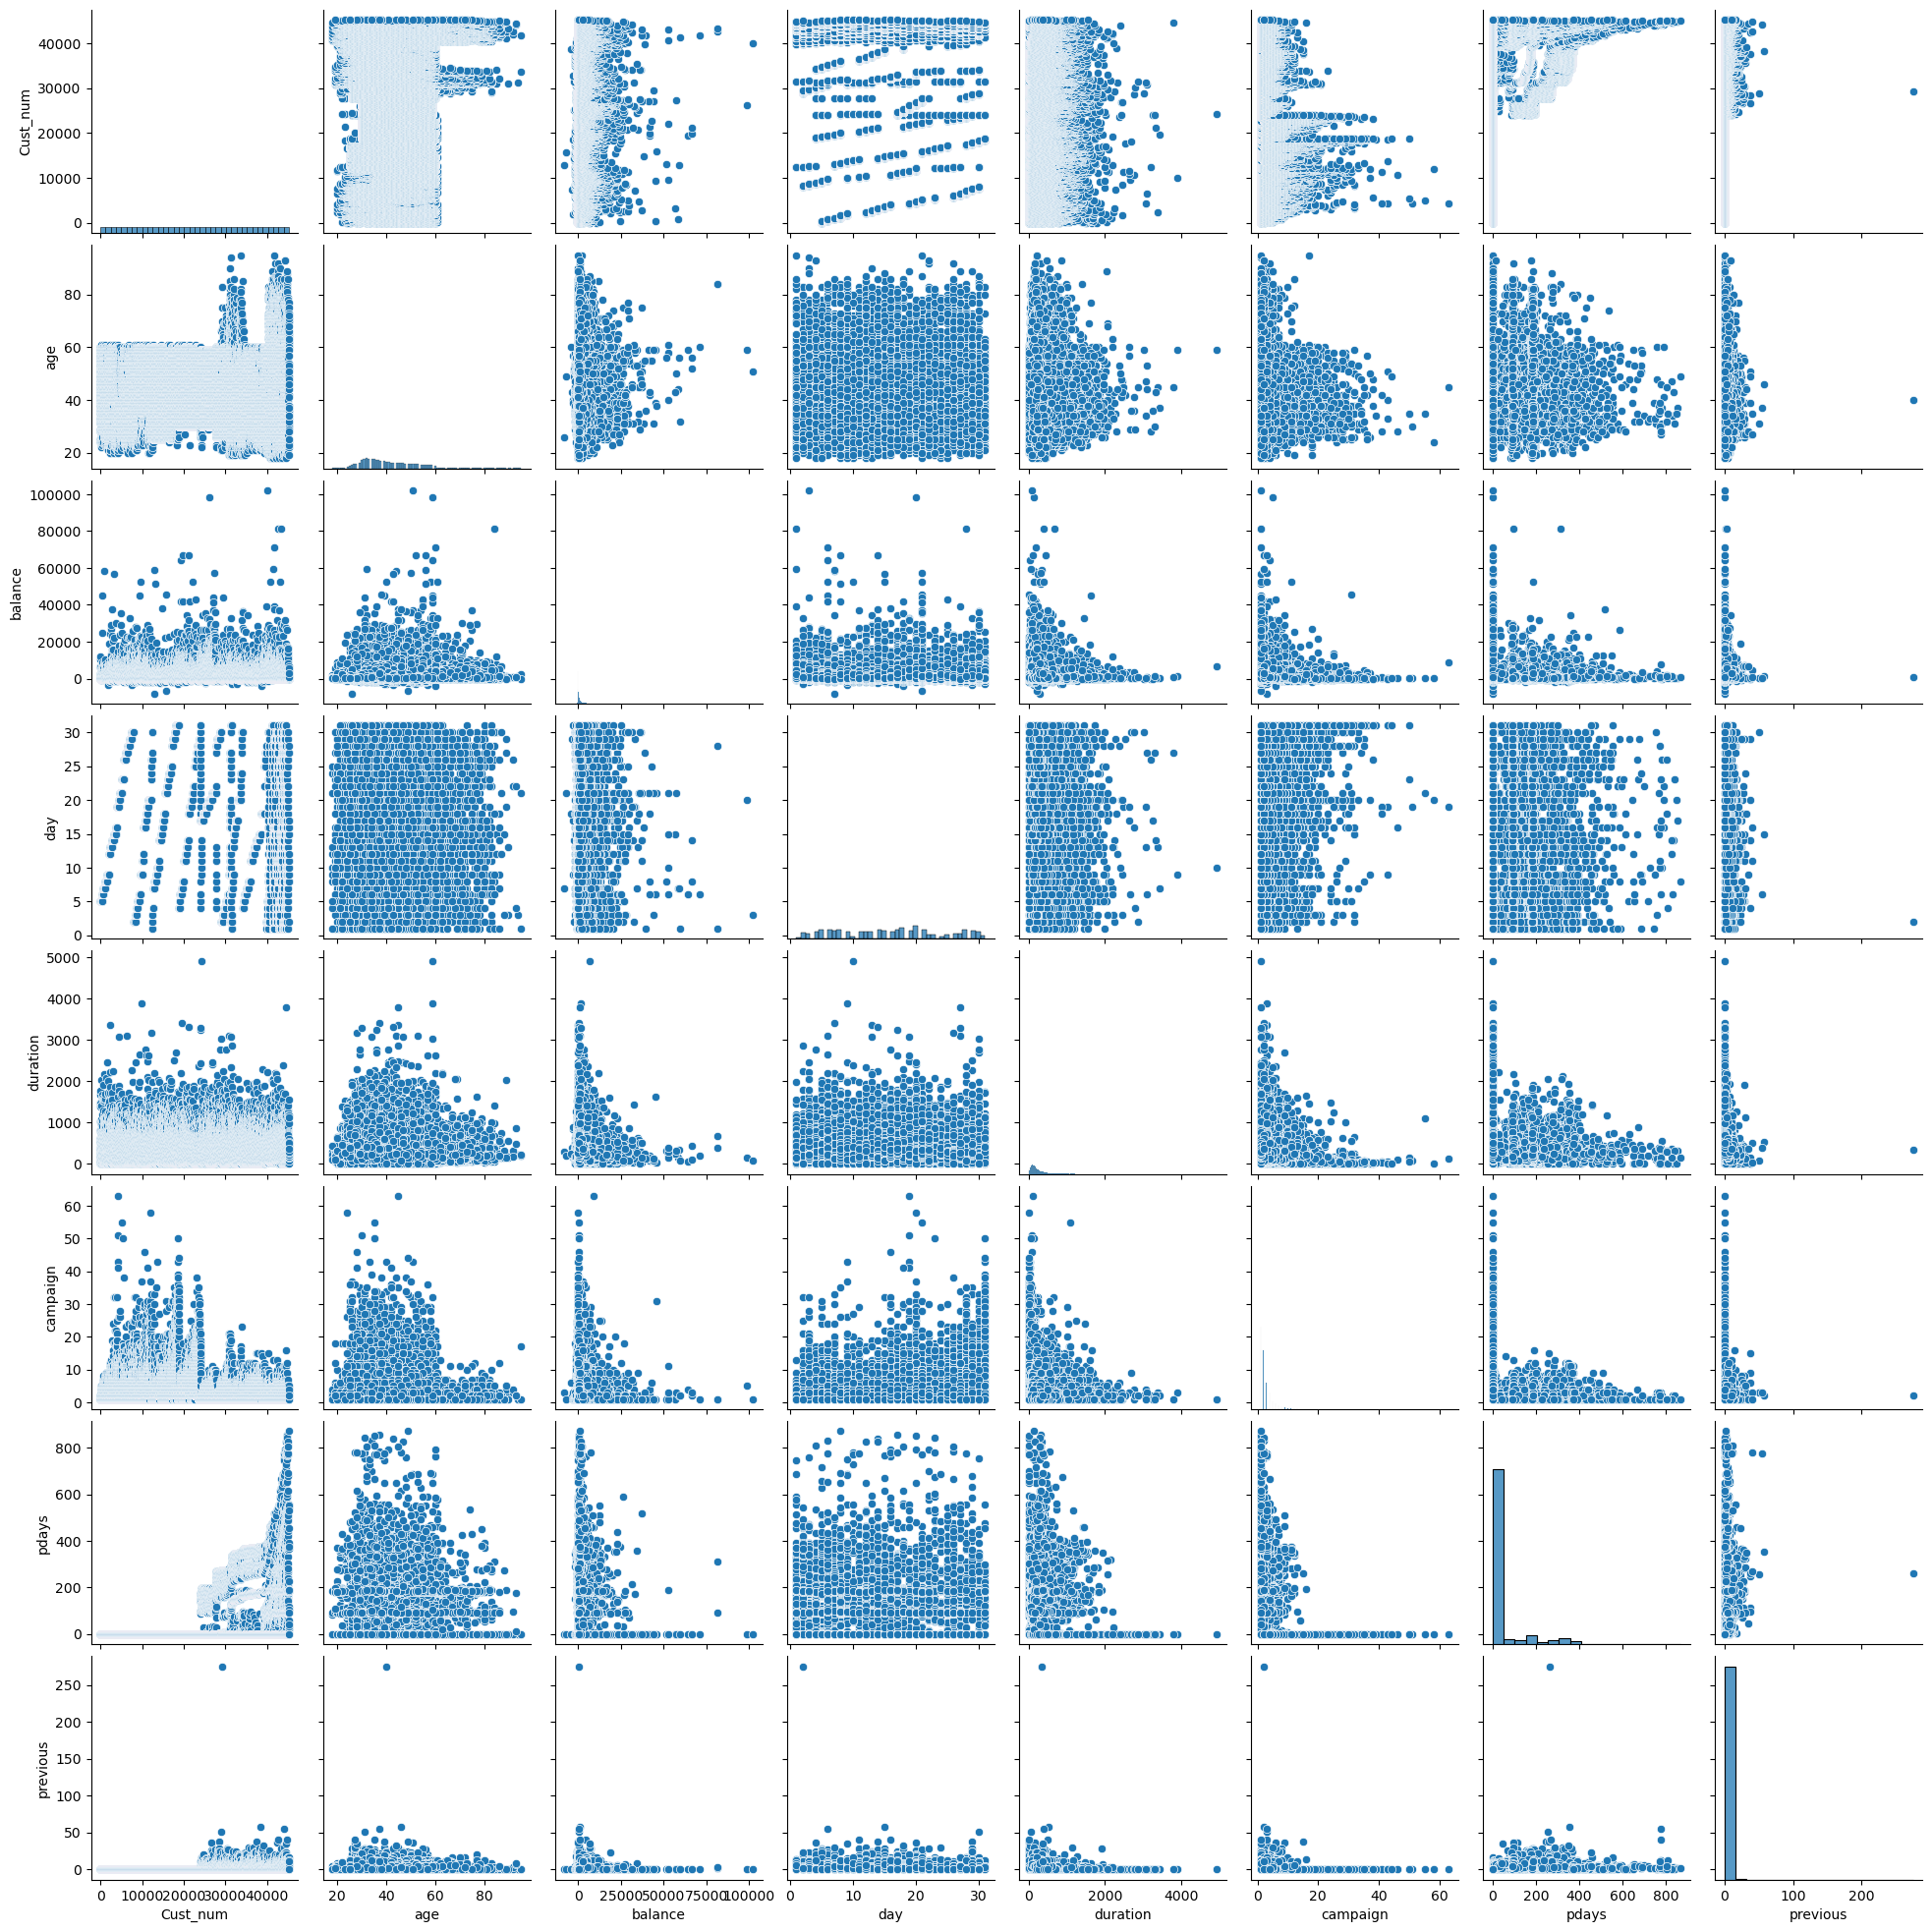

In [35]:
# scatter plot for numerical variables
plt.figure(dpi=140)
sns.pairplot(numerical)

**the scatter plot is is not meaningful due to the presence of outliers**

In [37]:
#taking log of every value to negate outliers
for column in numerical:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

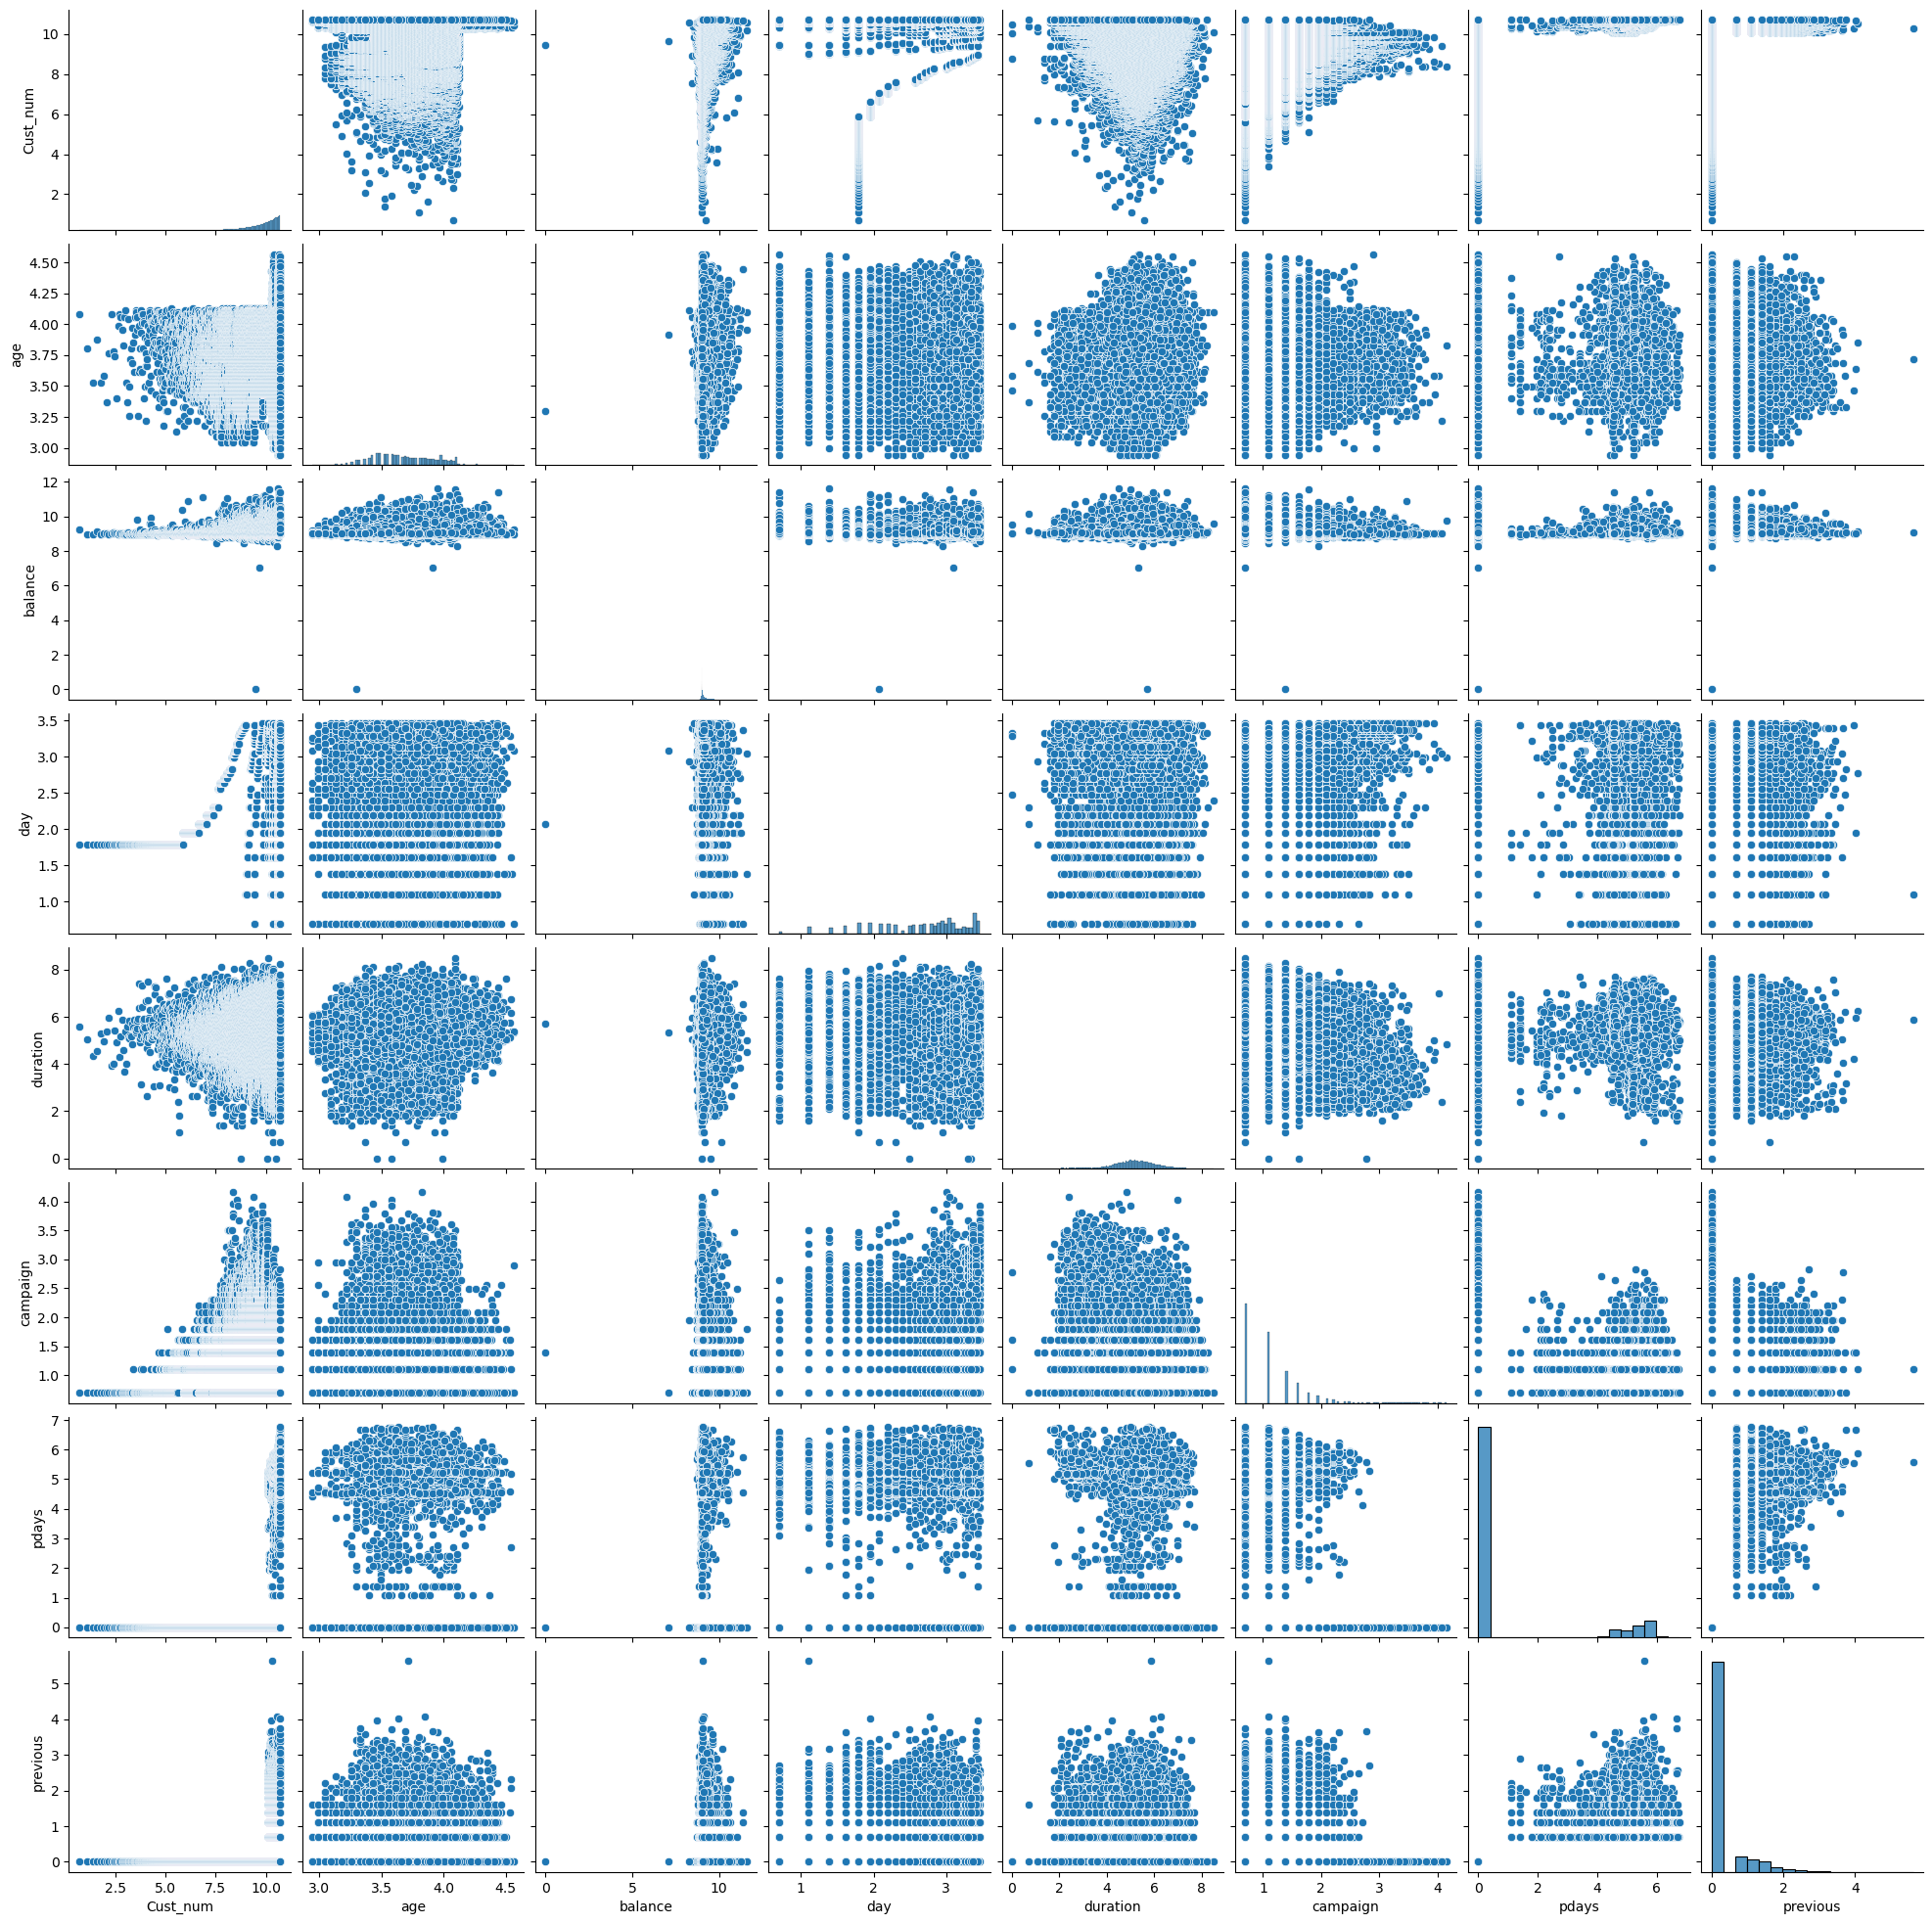

In [38]:
# scatter plot for numerical variables
plt.figure(dpi=140)
sns.pairplot(numerical)

There is no strong correlation between any of the variables. only pdays and previous have some negligable correlation

In [39]:
data.head()

Cust_num  age           job  marital  education default  balance housing  \
0         1   58    management  married   tertiary      no     2143     yes   
1         2   44    technician   single  secondary      no       29     yes   
2         3   33  entrepreneur  married  secondary      no        2     yes   
3         4   47   blue-collar  married    unknown      no     1506     yes   
4         5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no

## Bivariate : Categorical-Categorical

#### List of Hypothesis to check under this combination
1.   Are **high balance** customers more likely to deposit?
2.   Are **old customers** more likely to deposit?
3.   Are **married people** are more likely to deposit?
4.   Does **customer job** has any impact on term deposit?
5.   Does **education** has any relationship with term deposit?
6.   Does people who **do not have any loan** are more likely to deposit?
7.   Does the **non defaulters** are more likely to deposit?
8.   Does the **previous outcome of the marketing campaign** has any impact on accepting term deposit?
9.   Does the **number of campaigns** has any impact on accepting term deposit?
10.  Does the **average call duration** has any impact on accepting term deposit?

In [40]:
def BVA_categorical_plot(data, tar, cat):
 
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1. Are high balance customers more likely to deposit?

In [64]:
# creating a function to form groups for balance variable
def categorize_balance(data):
    if data['balance'] < 500:
        return "Very Low Balance"
    elif data['balance'] > 500 and data['balance'] < 3000:
        return "Low Balance"
    elif data['balance'] > 3000 and data['balance'] < 15000:
        return "Moderate Balance"
    elif data['balance'] > 15000 and data['balance'] < 25000:
        return "High Balance"
    else:
        return "Very High Balance"
    

In [67]:
# Adding a new column of balance group
data['bal_group'] = data.apply(categorize_balance,axis=1)

In [68]:
data.head()

Cust_num  age           job  marital  education default  balance housing  \
0         1   58    management  married   tertiary      no     2143     yes   
1         2   44    technician   single  secondary      no       29     yes   
2         3   33  entrepreneur  married  secondary      no        2     yes   
3         4   47   blue-collar  married    unknown      no     1506     yes   
4         5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  \
0   no  unknown    5   may       261         1     -1         0  unknown  no   
1   no  unknown    5   may       151         1     -1         0  unknown  no   
2  yes  unknown    5   may        76         1     -1         0  unknown  no   
3   no  unknown    5   may        92         1     -1         0  unknown  no   
4   no  unknown    5   may       198         1     -1         0  unknown  no   

          bal_group  
0       Low Balance  
1  Very Low Balance  
2  Very Low Balance  
3       Low Balance  
4  Very Low Balance

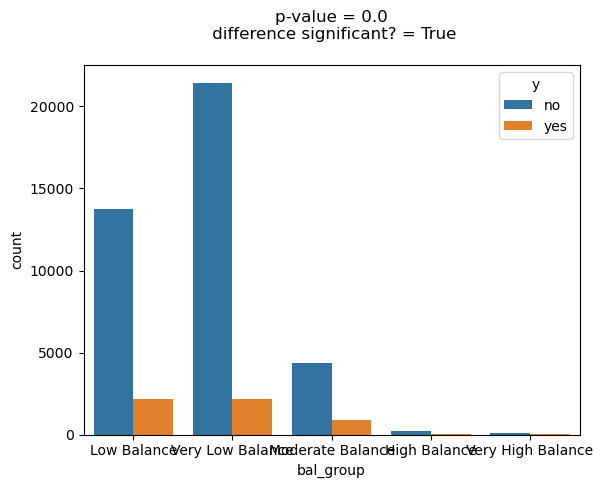

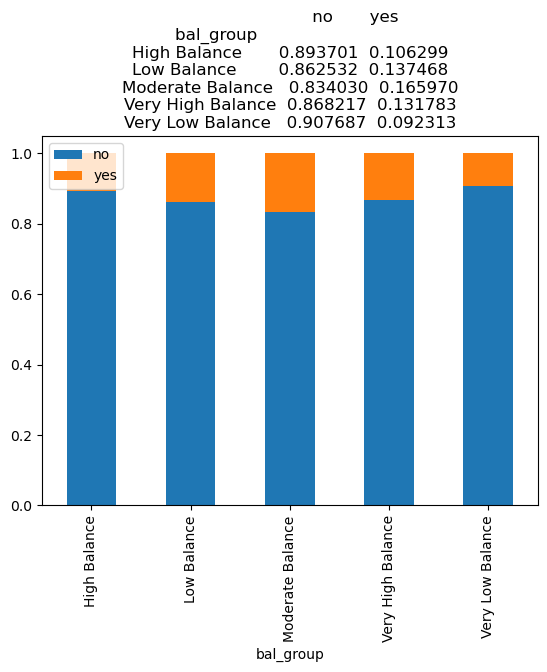

In [69]:
BVA_categorical_plot(data, 'y', 'bal_group')

* **Result**:
   the difference between the different balance categories is significant. But there is no strong correlation between any of   the balance group and target variable

### 2.   Are old customers more likely to deposit?

In [70]:
# function to create age groups
def age_group(data):
    if data['age'] >= 80:
        return "very old"
    elif data['age'] >= 60 and data['age'] < 80:
        return "senior citizen"
    elif data['age'] >= 18 and data['age'] < 60:
        return "adult"
    elif data['age'] < 18:
        return "young"
  

In [72]:
# creating a new column for age group
data['age_group'] = data.apply(age_group,axis=1)

In [76]:
data.head()

Cust_num  age           job  marital  education default  balance housing  \
0         1   58    management  married   tertiary      no     2143     yes   
1         2   44    technician   single  secondary      no       29     yes   
2         3   33  entrepreneur  married  secondary      no        2     yes   
3         4   47   blue-collar  married    unknown      no     1506     yes   
4         5   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  \
0   no  unknown    5   may       261         1     -1         0  unknown  no   
1   no  unknown    5   may       151         1     -1         0  unknown  no   
2  yes  unknown    5   may        76         1     -1         0  unknown  no   
3   no  unknown    5   may        92         1     -1         0  unknown  no   
4   no  unknown    5   may       198         1     -1         0  unknown  no   

          bal_group age_group  
0       Low Balance     adult  
1  Very Low Balance     adult  
2  Very Low Balance     adult  
3       Low Balance     adult  
4  Very Low Balance     adult

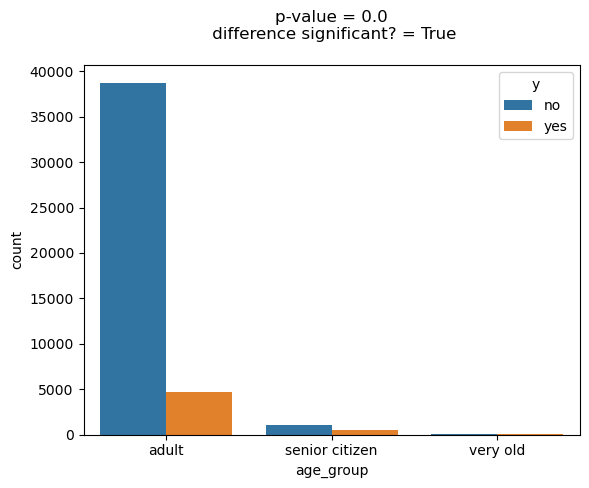

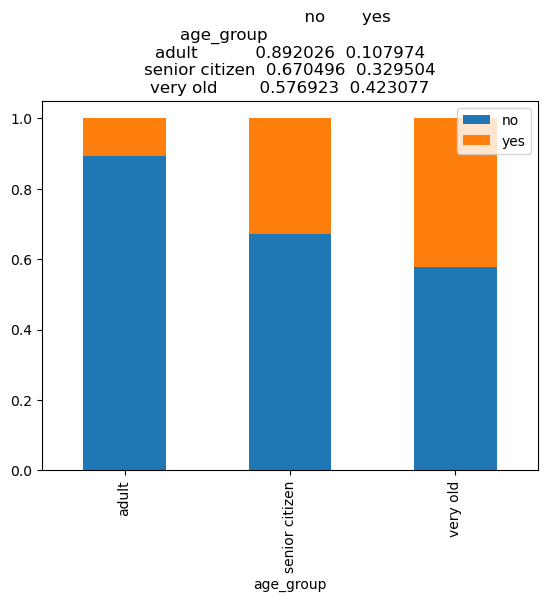

In [74]:
BVA_categorical_plot(data, 'y', 'age_group')

* **Result**:
  * the difference between the different age groups is significant.
  * adults are less likely to accept term deposit.
  * senior citizens and very old people are more likely to accept term deposit when compared to adults

### 3.   Are married people are more likely to deposit?

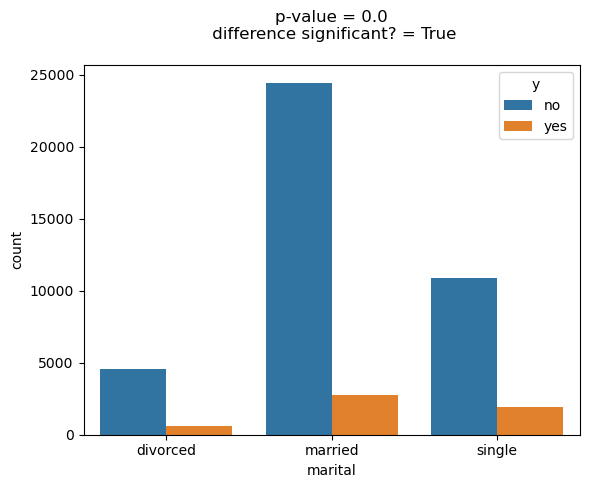

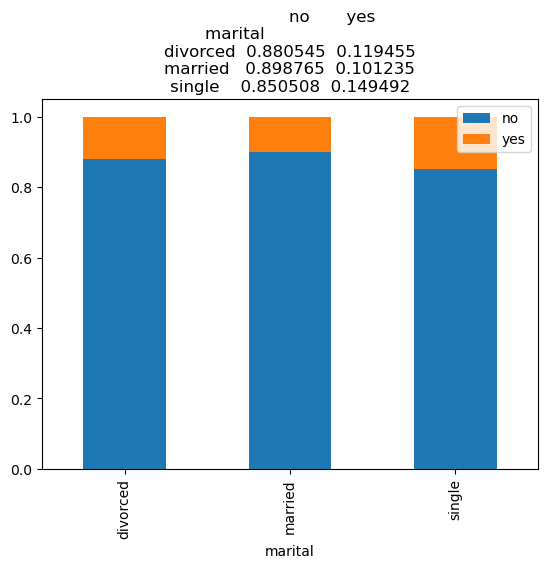

In [77]:
BVA_categorical_plot(data, 'y', 'marital')

* **Result**:
  * the difference between the different marital status is significant.
  * Married people are more likely to deposit. All marital status have similar impact oo target variable.
  * No single variable has string correlation with target variable

### 4.   Does customer job has any impact on term deposit?

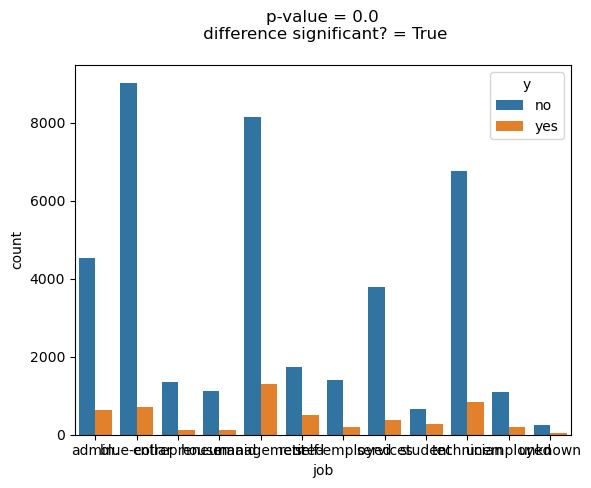

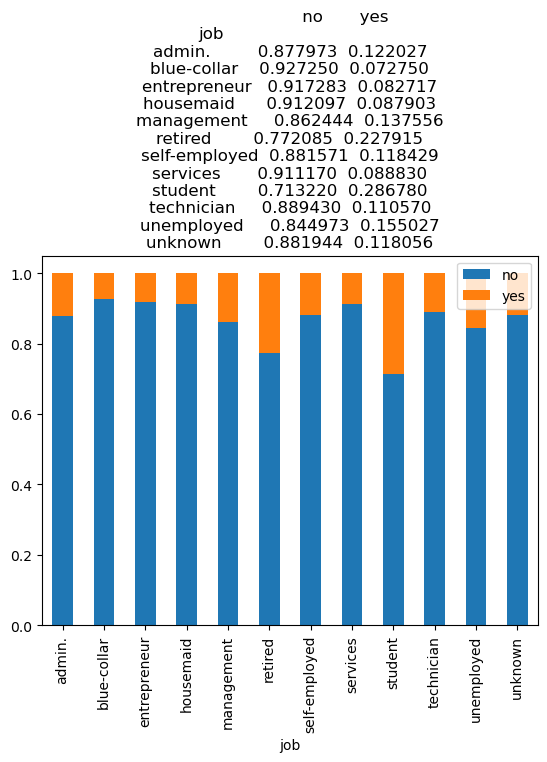

In [78]:
BVA_categorical_plot(data, 'y', 'job')

* **Result**:
  * the difference between the different occupation of the customer is significant.
  * student and retired peoples are more likely to accept term deposit when compared to all the other occupation.
  * the customer who is in blue collar job is less likely to accept term deposit as 92% of the people are said no to term deposit

### 5.   Does education has any relationship with term deposit?

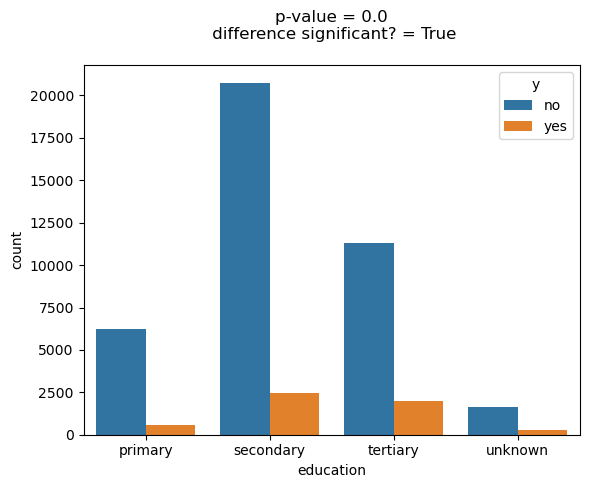

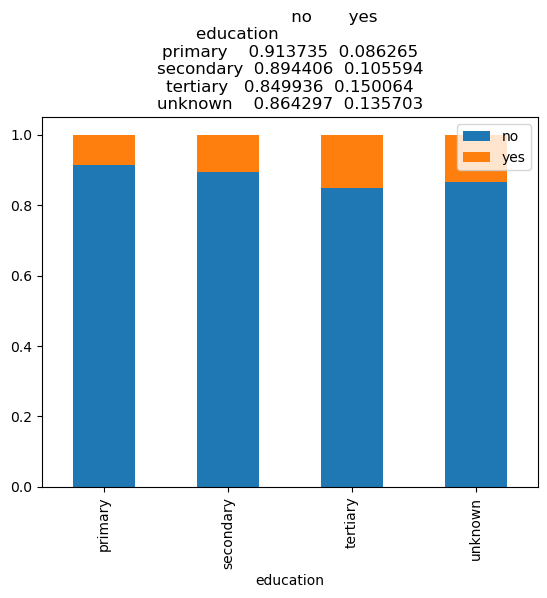

In [79]:
BVA_categorical_plot(data, 'y', 'education')

* **Result**:
  * the difference between the different qualification of the customer is significant.
  * as we can see higher the education higher chances that customer might accept term deposit.
  * higher education leads to higher acceptence rate for term deposit

### 6.   Does people who do not have any loan are more likely to deposit?

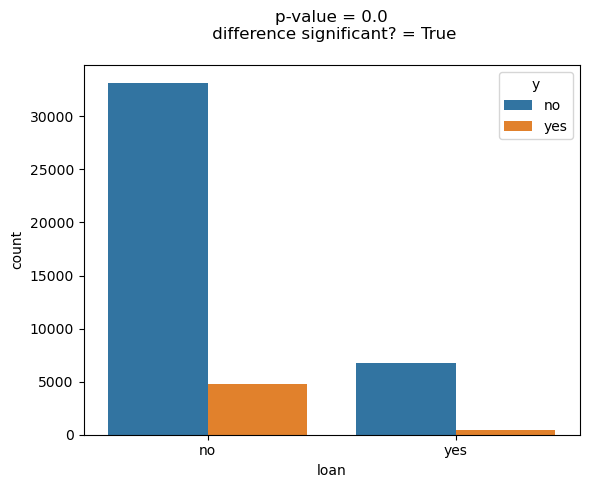

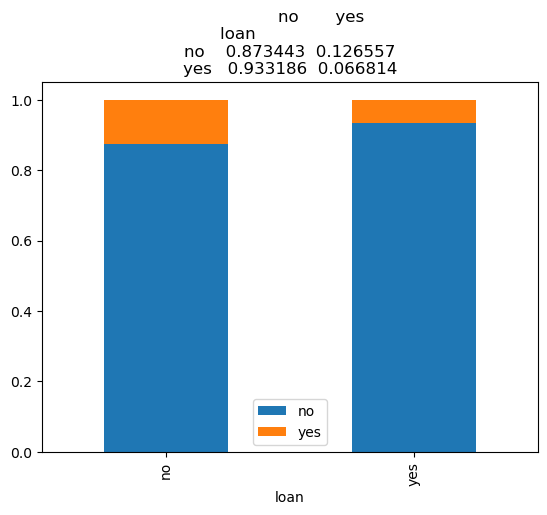

In [80]:
BVA_categorical_plot(data, 'y', 'loan')

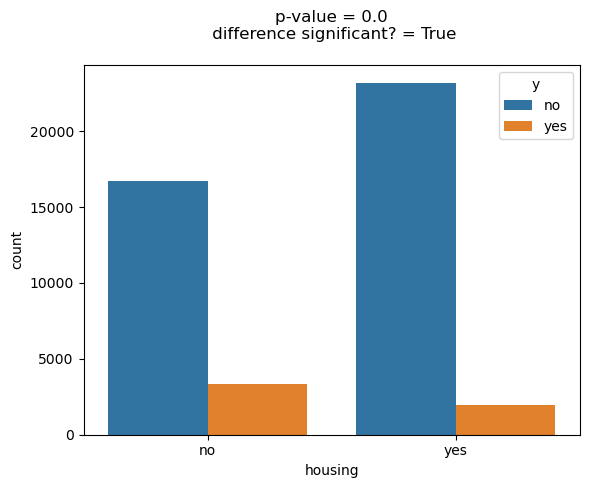

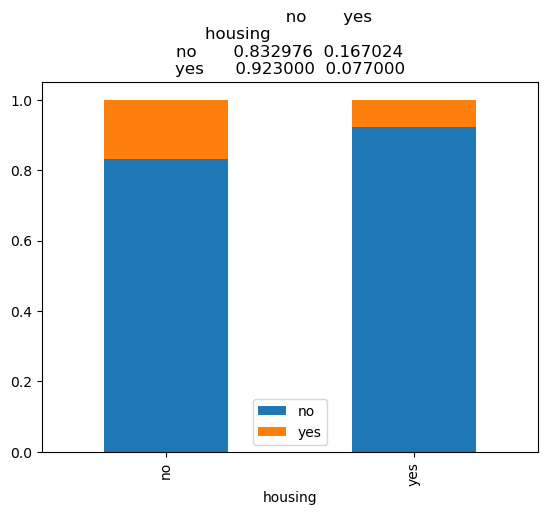

In [82]:
BVA_categorical_plot(data, 'y', 'housing')

* **Result**:
  * the difference between the different loans of the customer is significant.
  * people who have either personal loan or housing loan are less likely to accept term deposit when compared to people who dont have any loan.
  * people who do not have any loan are more likely to accept term deposit

### 7.   Does the non defaulters are more likely to deposit?

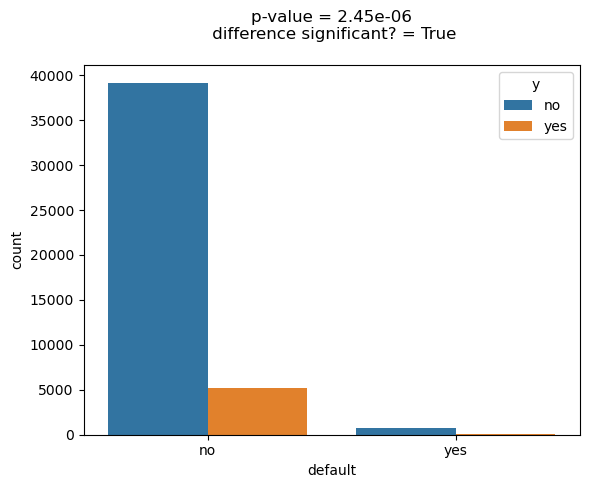

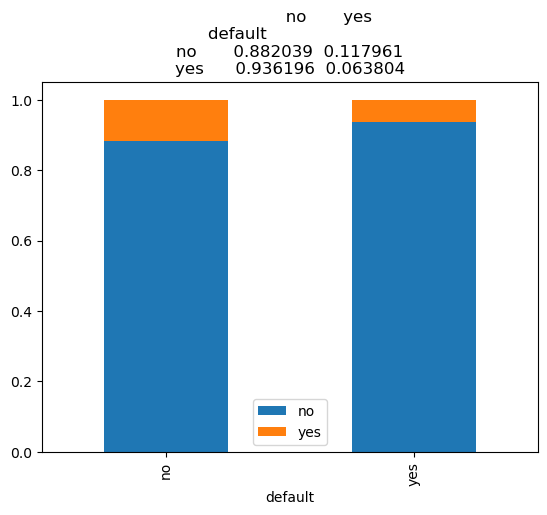

In [85]:
BVA_categorical_plot(data, 'y', 'default')

* **Result**:
  * the difference between the different default categories of the customer is significant.
  * Non defaulters are more likely to accept term deposit compared to defaulters.

### 8.   Does the previous outcome of the marketing campaign has any impact on accepting term deposit?

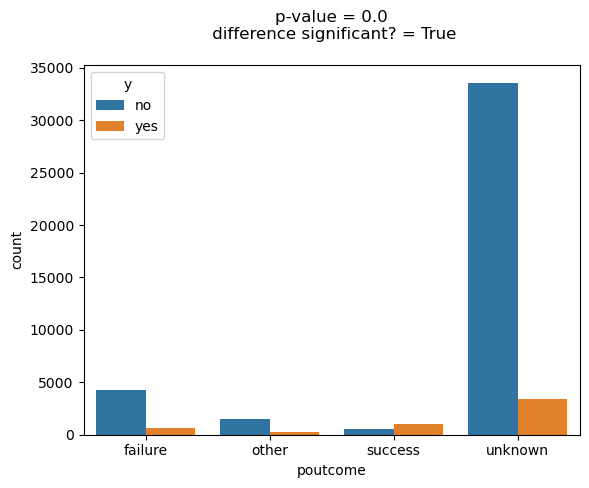

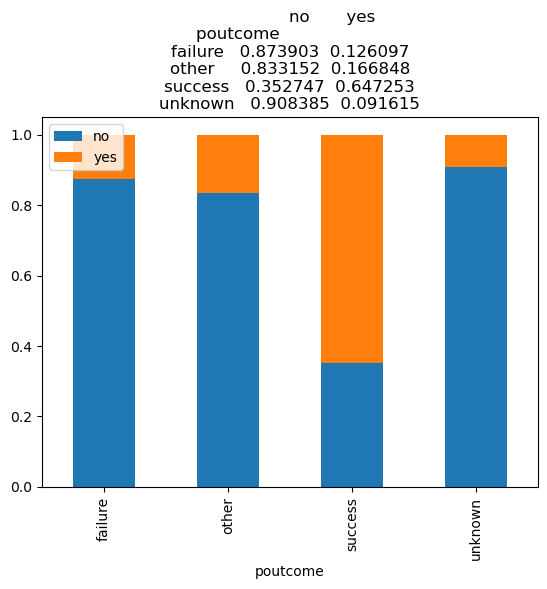

In [87]:
BVA_categorical_plot(data, 'y', 'poutcome')

* **Result**:
  * we can see the outcome of the previous marketing campaign has a huge impact on whether the customer will accept the term deposit or not.
  * if the previous marketing campaign is success then that customer is more likely to accept term deposit that is 64% of the customers will accept the deposit.
  * if the previous marketing campaign is failed then that customer is less likely to accept term deposit that is only around 12% of the people might accept the deposit

### 9.   Does the number of campaigns has any impact on accepting term deposit?

In [90]:
# function to create bins for number of campaigns
def campaign_group(data):
    if data['campaign'] <= 5:
        return "less contacts"
    elif data['campaign'] > 5 and data['campaign'] <= 15:
        return "medium contacts"
    elif data['campaign'] > 15 and data['campaign'] <= 30:
        return "high contacts"
    elif data['campaign'] > 30:
        return "very high contacts"

In [92]:
# creating new campaign group variable using campaign variable
data['campaign_group'] = data.apply(campaign_group,axis=1)

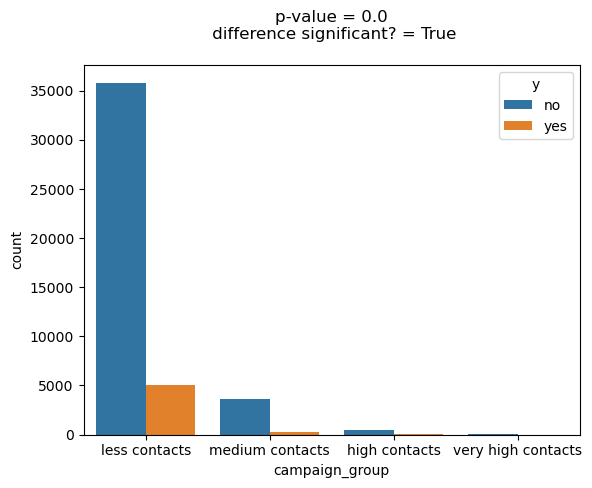

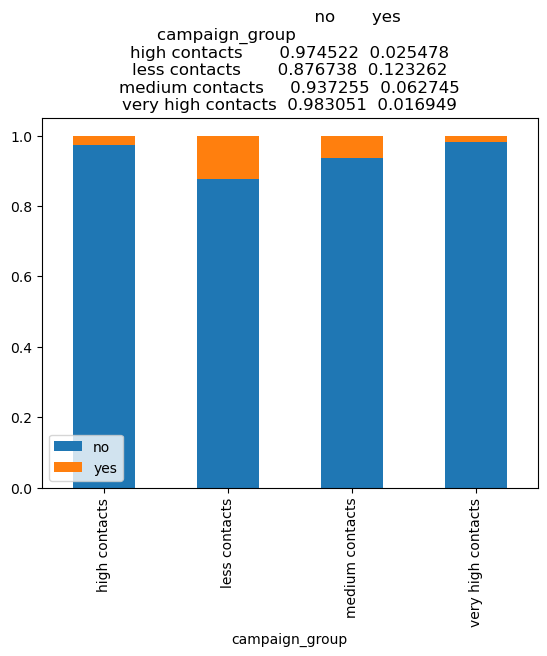

In [93]:
BVA_categorical_plot(data, 'y', 'campaign_group')

* **Result**:
  * the difference between all the categories in campaign group is sognificant.
  * we can see the trend as number of contacts are increasing the deposit acceptence rate is decreasing.
  * less contacts group has high deposit acceptence rate when compared to very high contacts group.

### 10.   Does the average call duration has any impact on accepting term deposit?

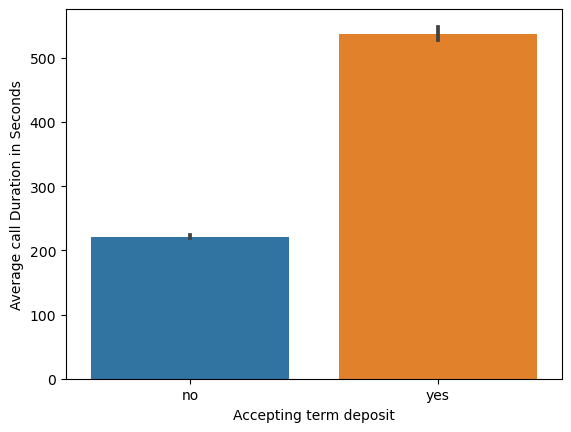

In [97]:
# checking average call duration impact on accepting term deposit
sns.barplot(x=data['y'],y=data['duration'])
plt.ylabel('Average call Duration in Seconds')
plt.xlabel('Accepting term deposit')
plt.show()

* **Result**:
  * we can clearly see that average call duration has a huge impact on target variable.
  * More customer had accepted term deposit when the duartion of the call is higher.
  * less customers had accepted the term deposit when the duration of the call is less.